In [5]:
import pandas as pd 
from wikidata2df import wikidata2df

with open("../queries/human_genes.rq", "r") as f:
    query = f.read()

df = wikidata2df(query)

In [7]:
markers = pd.read_csv("../data/PanglaoDB_markers_27_Mar_2020.tsv", sep = "\t")

In [11]:
human_markers = markers[["Hs" in val for val in markers["species"]]]

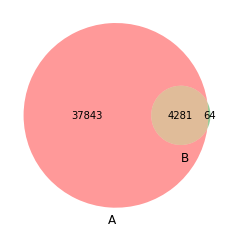

In [12]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

unique_genes_wikidata = set(df["hgnc"].values)
unique_genes_panglao = set(human_markers["official gene symbol"].values)

venn2([unique_genes_wikidata, unique_genes_panglao])
plt.show()


In [13]:
unique_genes_panglao - unique_genes_wikidata

{'AAED1',
 'ALCAM ',
 'C11ORF80',
 'C15ORF48',
 'C1ORF53',
 'C1ORF54',
 'C2ORF54',
 'C2ORF88',
 'CLCA3P',
 'CTGF',
 'CYR61',
 'FAM129B',
 'FAM129C',
 'FAM196A',
 'FAM198B',
 'FAM19A1',
 'FAM19A5',
 'FAM69B',
 'FAM84A',
 'FAM92B',
 'GGNBP1',
 'GLYCAM1',
 'GRASP',
 'GUSBP11',
 'H1FNT',
 'H2AFB1',
 'H2AFX',
 'H2AFY',
 'H2AFZ',
 'HILS1',
 'HIST1H1D',
 'HIST1H2AC',
 'HIST1H2AE',
 'HIST1H2BC',
 'HIST1H2BG',
 'HIST1H2BK',
 'HIST1H3H',
 'HIST2H2BE',
 'HLA-DRB6',
 'HRASLS5',
 'KIF1BP',
 'MARCH1',
 'MARCH11',
 'MKL2',
 'MRVI1',
 'MT1L',
 'MUM1',
 'NOV',
 'PPY2P',
 'PTGDS ',
 'SEPT1',
 'SEPT6',
 'SEPT9',
 'SIX3OS1',
 'SPERT',
 'SSPO',
 'T',
 'TMEM173',
 'UPK3B',
 'USMG5',
 'WDR60',
 'WISP1',
 'WISP2',
 'ZRSR1'}

For these cases, it is likely that panglao is not using the hgnc. Let`s check on Wikidata what are the likely best options. 

Most cases are issues regargind aliases. I'll note down any extraordinary cases.

- 'ALCAM ' : "ALCAM" failure was motivated by a space. 'PTGDS ' : "PTGDS" too. 

- C11ORF80' : "C11orf80" was motivated by capitalization

- CLCA3P is an instance of pseudogene on Wikidata. It will be added manually. GGNBP1 is too. GLYCAM1 is too. GUSBP11 is too. HLA-DRB6 is too. MT1L is too. PPY2P is too.

-  'HIST1H2BC and HIST1H2BG are associated alias of multiple genes.

- NOV is has also multiple references.

- SIX3OS1 is present as a human marker in panglao, but it has no reported homolog in humans.

- ZRSR1 is double listed as a gene and a pseudogene.



In [14]:
gene_retification = {
 'AAED1' : "PRXL2C",
 'ALCAM ' : "ALCAM",
 'C11ORF80' : "C11orf80",
 'C15ORF48' : "C15orf48",
 'C1ORF53' : "C1orf53",
 'C1ORF54' : "C1orf54",
 'C2ORF54' : "MAB21L4",
 'C2ORF88' : "C2orf88",
 'CLCA3P' : "CLCA3P",
 'CTGF' : "CCN2",
 'CYR61' : "CCN1",
 'FAM129B' : "NIBAN2",
 'FAM129C' : "NIBAN3",
 'FAM196A' : "INSYN2A",
 'FAM198B' : "GASK1B",
 'FAM19A1' : "TAFA1",
 'FAM19A5' : "TAFA5",
 'FAM69B' : "DIPK1B",
 'FAM84A' : "LRATD1",
 'FAM92B' : "CIBAR2",
 'GGNBP1' : "GGNBP1",
 'GLYCAM1' : "GLYCAM1",
 'GRASP' : "TAMALIN",
 'GUSBP11' : "GUSBP11",
 'H1FNT' : "H1-7",
 'H2AFB1' : "H2AB1",
 'H2AFX' : "H2AX",
 'H2AFY' : "MACROH2A1",
 'H2AFZ' : "H2AZ1",
 'HILS1' : "H1-9P",
 'HIST1H1D' : "H1-3",
 'HIST1H2AC' : "H2AC6",
 'HIST1H2AE' : "H2AC8",
 'HIST1H2BC' : "AMBIGUOUS",
 'HIST1H2BG' : "AMBIGUOUS",
 'HIST1H2BK' : "H2BC12",
 'HIST1H3H' : "H3C10",
 'HIST2H2BE' : "H2BC21",
 'HLA-DRB6' : "HLA-DRB6",
 'HRASLS5' : "PLAAT5",
 'KIF1BP' : "KIFBP",
 'MARCH1' : "MARCHF1",
 'MARCH11' : "MARCHF11",
 'MKL2' : "MRTFB",
 'MRVI1' : "IRAG1",
 'MT1L' : "MT1L",
 'MUM1' : "IRF4",
 'NOV' : "AMBIGUOUS",
 'PPY2P' : "PPY2P",
 'PTGDS ' : "PTGDS",
 'SEPT1' : "SEPTIN1",
 'SEPT6' : "SEPTIN6",
 'SEPT9' : "SEPTIN9",
 'SIX3OS1' : "NO HOMOLOG IN HUMANS",
 'SPERT' : "CBY2",
 'SSPO' : "SSPOP",
 'T' : "TBXT",
 'TMEM173' : "STING1",
 'UPK3B' : "LOC105375355",
 'USMG5' : "ATP5MD",
 'WDR60' : "DYNC2I1",
 'WISP1' : "CCN4",
 'WISP2' : "CCN5",
 'ZRSR1' : "ZRSR2P1"}

In [ ]:
human_marker